<h1>1. Выбрать набор данных для классификации с количеством показателей не менее 100</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import tree as tree_plot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Markdown

<h3>Было решено выбрать набор данных gene expression cancer RNA-Seq(<a>https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq</a>), так как он представляет собой классическую задачу классификации с достаточным для задания количеством показателей</h3>

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(columns=['Unnamed: 0'])

decisions = pd.read_csv('labels.csv')
decisions = decisions.Class.to_list()
decisions

['PRAD',
 'LUAD',
 'PRAD',
 'PRAD',
 'BRCA',
 'PRAD',
 'KIRC',
 'PRAD',
 'BRCA',
 'PRAD',
 'BRCA',
 'KIRC',
 'PRAD',
 'BRCA',
 'BRCA',
 'BRCA',
 'LUAD',
 'KIRC',
 'KIRC',
 'PRAD',
 'BRCA',
 'KIRC',
 'LUAD',
 'BRCA',
 'KIRC',
 'LUAD',
 'COAD',
 'BRCA',
 'BRCA',
 'BRCA',
 'BRCA',
 'BRCA',
 'KIRC',
 'BRCA',
 'PRAD',
 'BRCA',
 'KIRC',
 'LUAD',
 'BRCA',
 'BRCA',
 'KIRC',
 'PRAD',
 'PRAD',
 'KIRC',
 'KIRC',
 'BRCA',
 'PRAD',
 'COAD',
 'BRCA',
 'LUAD',
 'BRCA',
 'LUAD',
 'BRCA',
 'PRAD',
 'COAD',
 'BRCA',
 'BRCA',
 'COAD',
 'KIRC',
 'BRCA',
 'LUAD',
 'KIRC',
 'BRCA',
 'LUAD',
 'PRAD',
 'COAD',
 'BRCA',
 'PRAD',
 'KIRC',
 'BRCA',
 'KIRC',
 'BRCA',
 'BRCA',
 'LUAD',
 'BRCA',
 'LUAD',
 'BRCA',
 'KIRC',
 'PRAD',
 'COAD',
 'BRCA',
 'PRAD',
 'BRCA',
 'BRCA',
 'PRAD',
 'PRAD',
 'BRCA',
 'BRCA',
 'KIRC',
 'BRCA',
 'PRAD',
 'PRAD',
 'BRCA',
 'BRCA',
 'BRCA',
 'PRAD',
 'COAD',
 'BRCA',
 'PRAD',
 'BRCA',
 'BRCA',
 'KIRC',
 'BRCA',
 'KIRC',
 'LUAD',
 'KIRC',
 'LUAD',
 'COAD',
 'LUAD',
 'LUAD',
 'PRAD',
 

In [3]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


<h1>2. Построить модель DecisionTreeClassifier и исследовать влияние гиперпараметров алгоритма на качество классификации (число уровней, минимальное число объектов узла)</h1>

<h3>Исследование зависимости точности классификации от количества уровней дерева</h3>
<a id="root_cell"></a>

In [4]:
def decision_tree_by_depth(data, labels, depth):
    tree = DecisionTreeClassifier(max_depth=depth)
    train, test, train_target, test_target = train_test_split(data, labels, test_size=0.2, random_state=10)
    tree.fit(train, train_target)
    predictions = tree.predict(test)
    display(Markdown(f"<h4>При числе уровней {depth}: {sum(predictions==test_target)} из {len(test_target)}<h4>"))
decision_tree_by_depth(df, decisions, 5)
decision_tree_by_depth(df, decisions, 4)
decision_tree_by_depth(df, decisions, 3)
decision_tree_by_depth(df, decisions, 2)

<h4>При числе уровней 5: 157 из 161<h4>

<h4>При числе уровней 4: 154 из 161<h4>

<h4>При числе уровней 3: 140 из 161<h4>

<h4>При числе уровней 2: 112 из 161<h4>

<h4>Как мы видим при снижении числа уровней дерева в диапазоне 5 - 2, точность предсказаний модели снижается</h4>

<h3>Исследование зависимости точности классификации от минимального числа объектов узла</h3>

In [5]:
def decision_tree_by_min_samples(data, labels, min_samples_leaf):
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    train, test, train_target, test_target = train_test_split(data, labels, test_size=0.2, random_state=10)
    tree.fit(train, train_target)
    predictions = tree.predict(test)
    display(Markdown(f"<h4>При миниамльном количестве объектов в узле {min_samples_leaf}: {sum(predictions==test_target)} из {len(test_target)}<h4>"))

decision_tree_by_min_samples(df, decisions, 200)
decision_tree_by_min_samples(df, decisions, 50)
decision_tree_by_min_samples(df, decisions, 10)
decision_tree_by_min_samples(df, decisions, 3)

<h4>При миниамльном количестве объектов в узле 200: 113 из 161<h4>

<h4>При миниамльном количестве объектов в узле 50: 155 из 161<h4>

<h4>При миниамльном количестве объектов в узле 10: 157 из 161<h4>

<h4>При миниамльном количестве объектов в узле 3: 158 из 161<h4>

<h3>Структура дерева решений</h3>

[Text(0.6363636363636364, 0.9166666666666666, 'node #0\nx[18746] <= 10.726\ngini = 0.76\nsamples = 640\nvalue = [236, 63, 118, 115, 108]'),
 Text(0.45454545454545453, 0.75, 'node #1\nx[6733] <= 9.368\ngini = 0.745\nsamples = 409\nvalue = [6, 63, 118, 115, 107]'),
 Text(0.36363636363636365, 0.5833333333333334, 'node #2\nx[9175] <= 7.832\ngini = 0.661\nsamples = 291\nvalue = [6, 63, 0, 115, 107]'),
 Text(0.2727272727272727, 0.4166666666666667, 'node #3\nx[11464] <= 8.7\ngini = 0.491\nsamples = 184\nvalue = [6, 63, 0, 115, 0]'),
 Text(0.18181818181818182, 0.25, 'node #4\nx[15898] <= 2.28\ngini = 0.094\nsamples = 121\nvalue = [6, 0, 0, 115, 0]'),
 Text(0.09090909090909091, 0.08333333333333333, 'node #5\ngini = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0, 0]'),
 Text(0.2727272727272727, 0.08333333333333333, 'node #6\ngini = 0.0\nsamples = 115\nvalue = [0, 0, 0, 115, 0]'),
 Text(0.36363636363636365, 0.25, 'node #7\ngini = 0.0\nsamples = 63\nvalue = [0, 63, 0, 0, 0]'),
 Text(0.45454545454545453, 0.

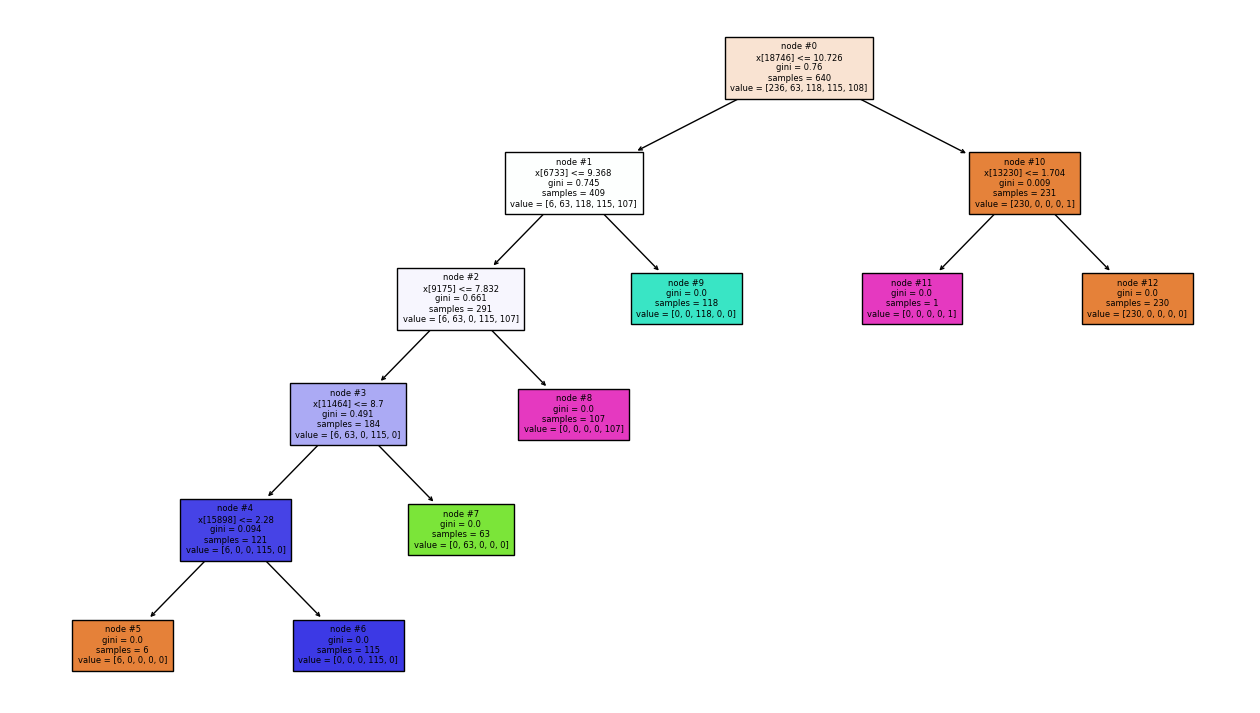

In [7]:
tree = DecisionTreeClassifier(max_depth=5)
train, test, train_target, test_target = train_test_split(df, decisions, test_size=0.2, random_state=10)
tree.fit(train, train_target)
plt.figure(figsize=(16,9))  
tree_plot.plot_tree(
    tree,
    filled=True,
    node_ids=True,
    fontsize=6,
)


<h4>Гены, участвующие в структуре дерева</h4>

In [ ]:
features = df.columns[tree.tree_.feature]
display(features.to_list())

['gene_18746',
 'gene_6733',
 'gene_9175',
 'gene_3523',
 'gene_20529',
 'gene_20529',
 'gene_20529',
 'gene_20529',
 'gene_15912',
 'gene_20529',
 'gene_20529']

<Axes: ylabel='gene_18746'>

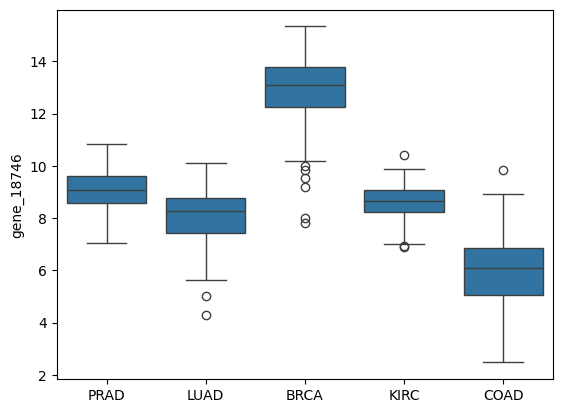

In [ ]:
root = features[0]
seaborn.boxplot(x=decisions, y=root, data=df)

<h3>Проведем эксперимент с исключением корневого показателя</h3>

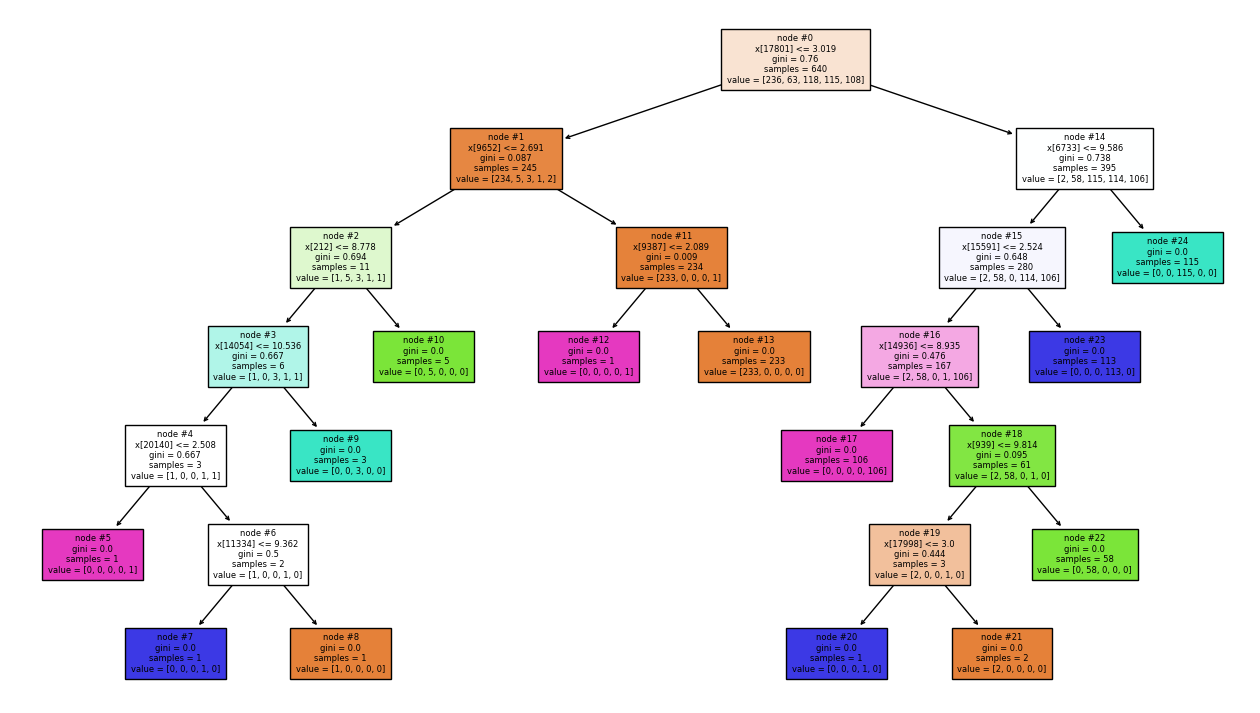

In [ ]:
df_without_root=df.drop(columns=[root])
tree = DecisionTreeClassifier()
train_data, test_data, train_target, test_target = train_test_split(df_without_root, decisions, test_size=0.2, random_state=10)
tree.fit(train_data, train_target)
plt.figure(figsize=(16,9))
tree_plot.plot_tree(
    tree,
    filled=True,
    node_ids=True,
    fontsize=6 
);


In [ ]:
decision_tree_by_depth(df_without_root, decisions, 5)
decision_tree_by_depth(df_without_root, decisions, 4)
decision_tree_by_depth(df_without_root, decisions, 3)
decision_tree_by_depth(df_without_root, decisions, 2)

<h4>При числе уровней 5: 153 из 161<h4>

<h4>При числе уровней 4: 152 из 161<h4>

<h4>При числе уровней 3: 142 из 161<h4>

<h4>При числе уровней 2: 114 из 161<h4>

<h4>Как мы видим, при удалении корневого показателя из выборки точность классификации увеличилась</h4>

<h1>3. Построить модель RandomForest и исследовать влияние гиперпараметров алгоритма на качество классификации (число деревьев, число отбираемых показателей, построение полных\ограниченных деревьев). Для выбранной модели привести структуру 3 деревьев решений, участвующих в модели.</h1>

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(df, decisions, test_size=0.2, random_state=10) 
forest = RandomForestClassifier()
forest.fit(train_data, train_target)
predictions = forest.predict(test_data)
display(Markdown(f"<h4>{sum(predictions==test_target)} из {len(test_target)}<h4>"))  

<h4>161 из 161<h4>

<h3>Исследуем зависимость точности классификации от количества деревьев</h3>

In [8]:
def random_forest_by_n_trees(data, decisions, n_trees):
    train_data, test_data, train_target, test_target = train_test_split(data, decisions, test_size=0.2, random_state=10) 
    forest = RandomForestClassifier(n_estimators=n_trees)
    forest.fit(train_data, train_target)
    predictions = forest.predict(test_data)
    display(Markdown(f"<h4>При {n_trees} деревьях: {sum(predictions==test_target)} из {len(test_target)}<h4>"))

random_forest_by_n_trees(df, decisions, 100)
random_forest_by_n_trees(df, decisions, 50)
random_forest_by_n_trees(df, decisions, 10)
random_forest_by_n_trees(df, decisions, 3)

<h4>При 100 деревьях: 161 из 161<h4>

<h4>При 50 деревьях: 161 из 161<h4>

<h4>При 10 деревьях: 160 из 161<h4>

<h4>При 3 деревьях: 154 из 161<h4>

<h4>Как мы видим, точность классификации повышается с ростом количества деревьев</h4>

<h3>Исследуем зависимость точности классификации от числа отбираемых показателей</h3>

In [9]:
def random_forest_by_max_features(data, decisions, max_features):
    train_data, test_data, train_target, test_target = train_test_split(data, decisions, test_size=0.2, random_state=10) 
    forest = RandomForestClassifier(max_features=max_features)
    forest.fit(train_data, train_target)
    predictions = forest.predict(test_data)
    display(Markdown(f"<h4>При максимальном числе показателей {max_features}: {sum(predictions==test_target)} из {len(test_target)}<h4>"))

random_forest_by_max_features(df, decisions, 300)
random_forest_by_max_features(df, decisions, 150)
random_forest_by_max_features(df, decisions, 50)
random_forest_by_max_features(df, decisions, 2)

<h4>При максимальном числе показателей 300: 160 из 161<h4>

<h4>При максимальном числе показателей 150: 161 из 161<h4>

<h4>При максимальном числе показателей 50: 161 из 161<h4>

<h4>При максимальном числе показателей 2: 158 из 161<h4>

<h4>Как мы видим, с ростом максимального числа показателей, точность классификации увеличивается</h4>

<h3>Исследуем зависимость точности классификации от глубины деревьев</h3>

In [ ]:
def random_forest_by_tree_depth(data, decisions, depth):
    train_data, test_data, train_target, test_target = train_test_split(data, decisions, test_size=0.2, random_state=10) 
    forest = RandomForestClassifier(max_depth=depth)
    forest.fit(train_data, train_target)
    predictions = forest.predict(test_data)
    display(Markdown(f"<h4>При максимальной глубине дерева {depth}: {sum(predictions==test_target)} из {len(test_target)}<h4>"))

random_forest_by_tree_depth(df, decisions, 10)
random_forest_by_tree_depth(df, decisions, 5)
random_forest_by_tree_depth(df, decisions, 3)
random_forest_by_tree_depth(df, decisions, 2)

<h4>При максимальной глубине дерева 10: 161 из 161<h4>

<h4>При максимальной глубине дерева 5: 160 из 161<h4>

<h4>При максимальной глубине дерева 3: 160 из 161<h4>

<h4>При максимальной глубине дерева 2: 142 из 161<h4>

<h4>Как мы можем видеть, при увеличении максимально допустимой глубины дерева, точность классификации увеличивается</h4>

<h3>Приведем структуру трех деревьев участвующих в модели</h3>

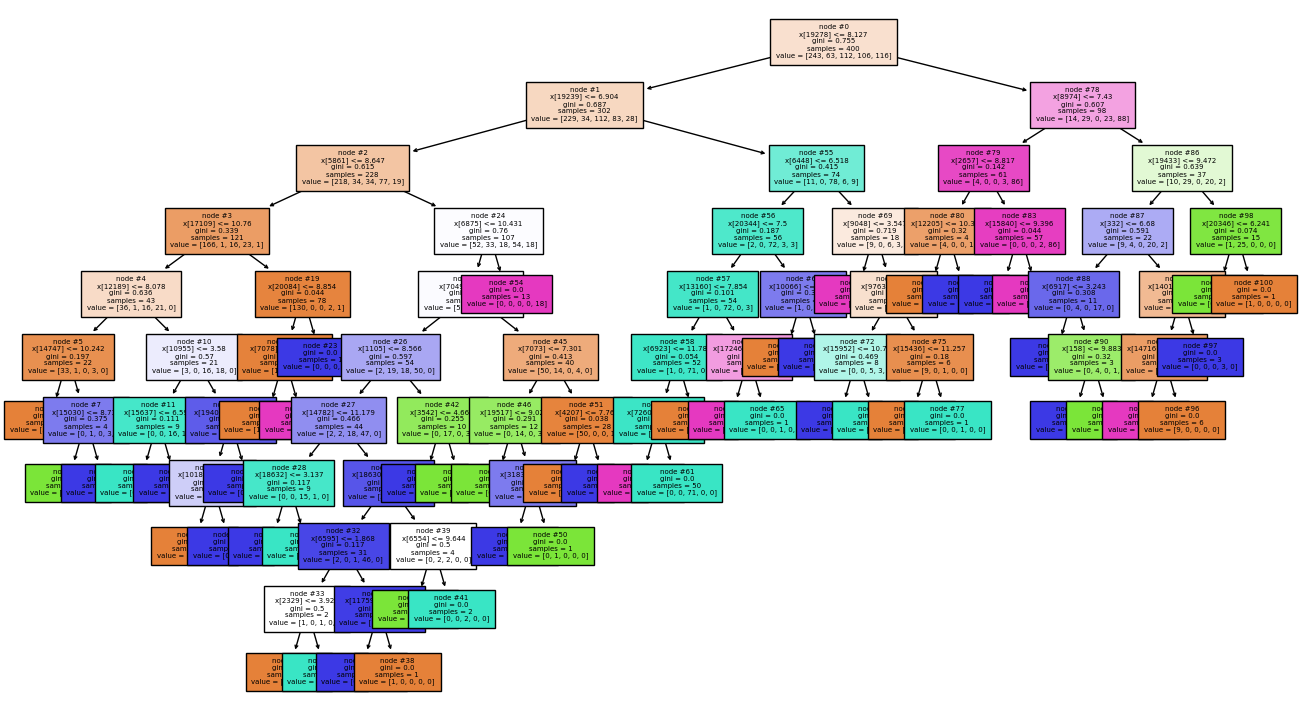

In [11]:
train_data, test_data, train_target, test_target = train_test_split(df, decisions, test_size=0.2, random_state=10) 
forest = RandomForestClassifier(max_features=15)
forest.fit(train_data, train_target)
plt.figure(figsize=(16,9))
tree_plot.plot_tree(
    forest.estimators_[0],
    filled=True,
    node_ids=True,
    fontsize=5 
);


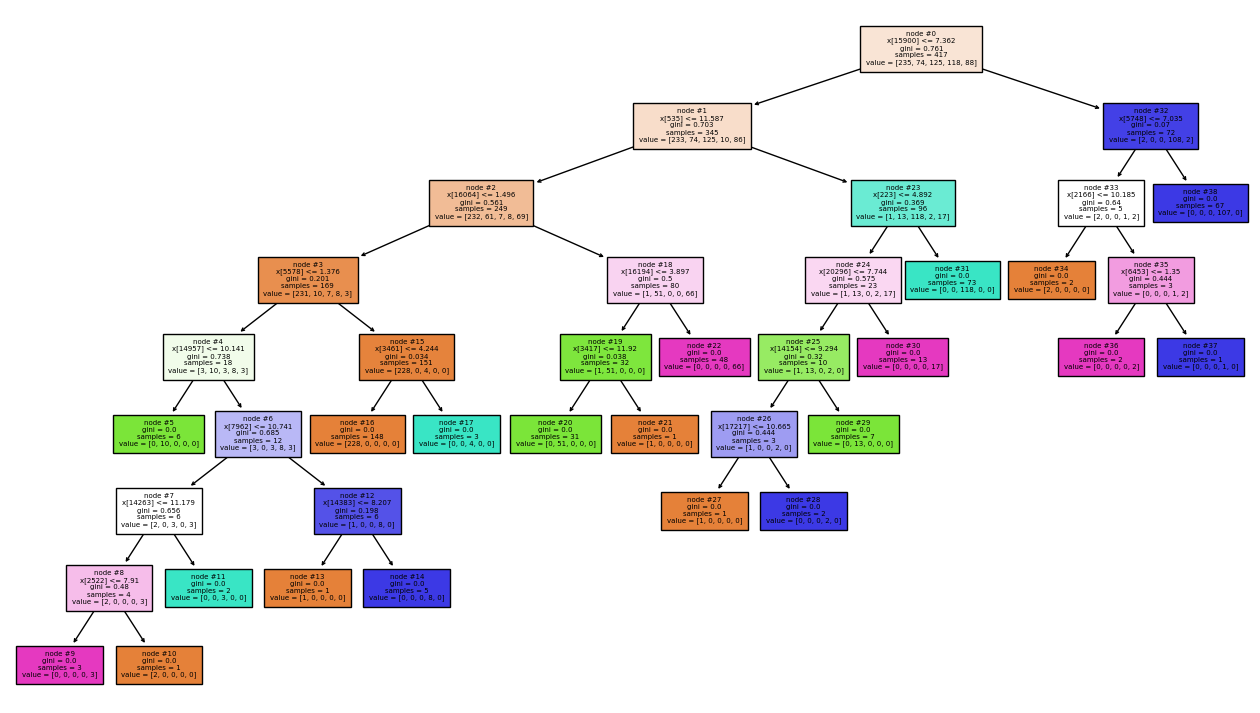

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(df, decisions, test_size=0.2, random_state=10) 
forest = RandomForestClassifier()
forest.fit(train_data, train_target)
plt.figure(figsize=(16,9))
tree_plot.plot_tree(
    forest.estimators_[1],
    filled=True,
    node_ids=True,
    fontsize=5 
);


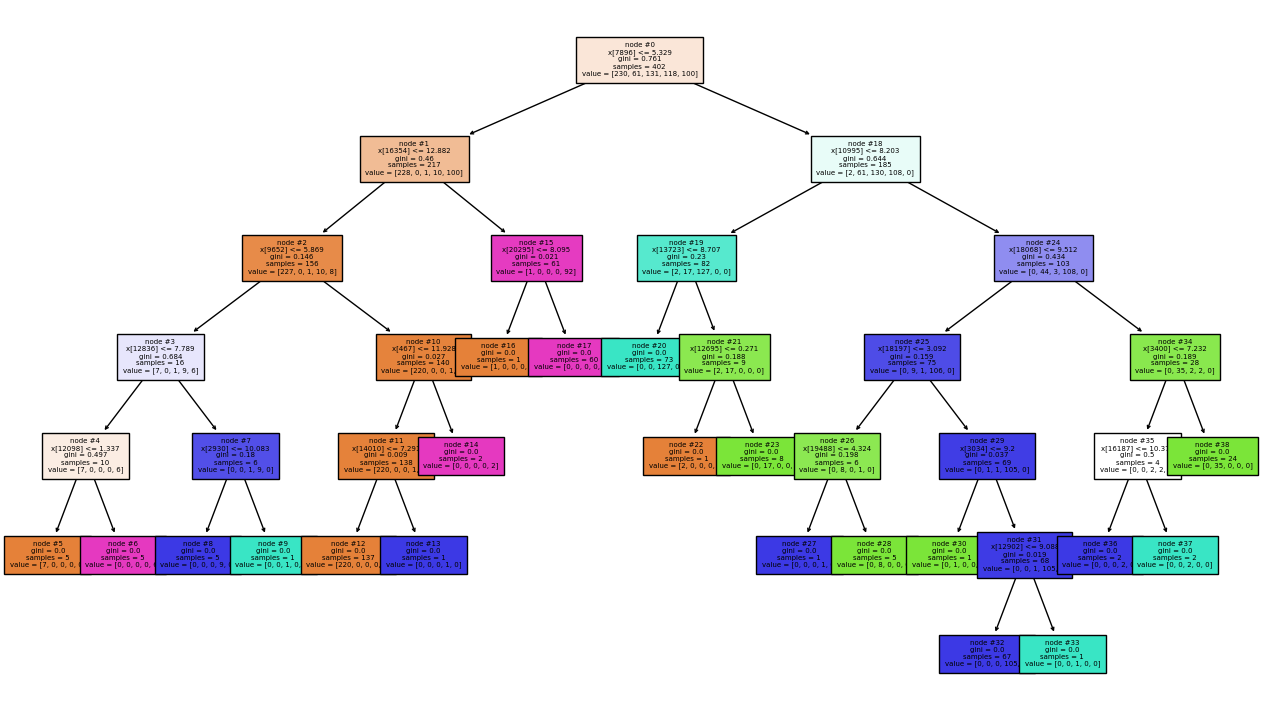

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(df, decisions, test_size=0.2, random_state=10) 
forest = RandomForestClassifier()
forest.fit(train_data, train_target)
plt.figure(figsize=(16,9))
tree_plot.plot_tree(
    forest.estimators_[2],
    filled=True,
    node_ids=True,
    fontsize=5 
);


<h1>4. Получить оценки важности показателей с помощью модели RandomForest. Для трёх показателей с наибольшей оценкой важности привести диаграммы с группировкой по классу (boxplot или countplot).</h1>

In [ ]:
importance = pd.Series(forest.feature_importances_, index=df.columns).sort_values(ascending=False)[:3]
importance

gene_15898    0.009797
gene_18746    0.008352
gene_11393    0.008007
dtype: float64

<Axes: ylabel='gene_15898'>

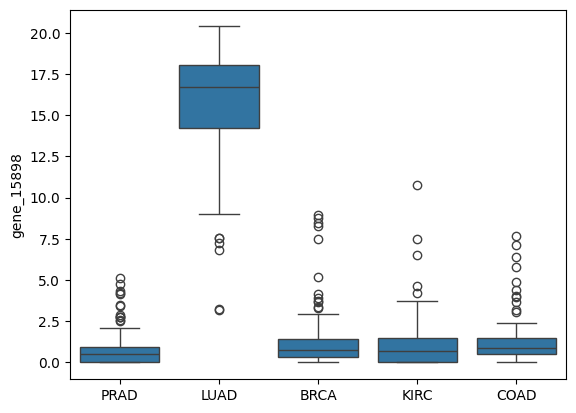

In [ ]:
seaborn.boxplot(x=decisions, y=importance.index[0], data=df)    


<Axes: ylabel='gene_18746'>

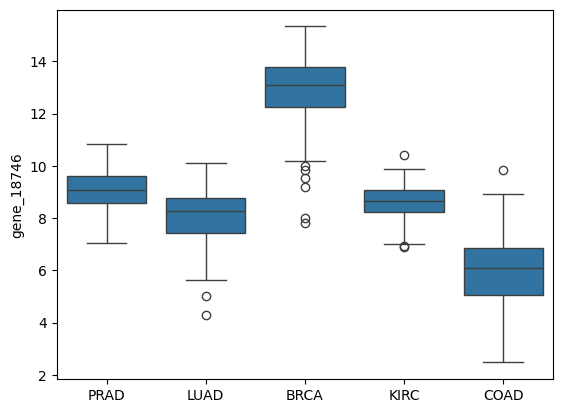

In [ ]:
seaborn.boxplot(x=decisions, y=importance.index[1], data=df)    


<Axes: ylabel='gene_11393'>

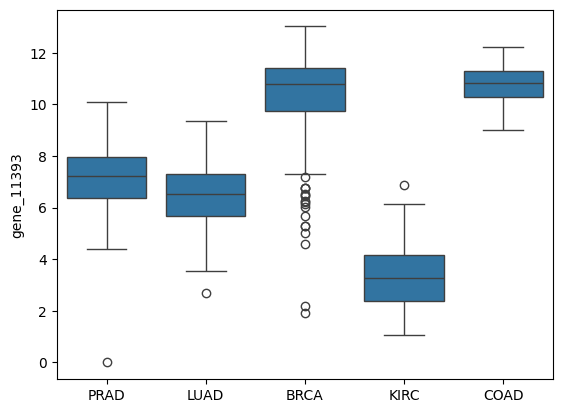

In [ ]:
seaborn.boxplot(x=decisions, y=importance.index[2], data=df)    


<h1>5. Построить три модели классификации одного типа DecisionTree на разных наборах показателей</h1>

<h3>На полном наборе показателей</h3>

In [ ]:
tree = DecisionTreeClassifier()
train, test, train_target, test_target = train_test_split(df, decisions, test_size=0.2, random_state=10)
tree.fit(train, train_target)
predictions = tree.predict(test)
display(Markdown(f"<h4> {sum(predictions==test_target)} из {len(test_target)}<h4>"))

<h4> 157 из 161<h4>

<h3>На 30% показателей с наибольшими оценками важности</h3>

In [ ]:
importance = pd.Series(forest.feature_importances_, index=df.columns).sort_values(ascending=False).index
importance = importance[:int(len(importance)*0.3)]
tree = DecisionTreeClassifier()
train, test, train_target, test_target = train_test_split(df[importance], decisions, test_size=0.2, random_state=10)
tree.fit(train, train_target)
predictions = tree.predict(test)
display(Markdown(f"<h4> {sum(predictions==test_target)} из {len(test_target)}<h4>"))

<h4> 158 из 161<h4>

<h3>На 30% показателей с наименьшими оценками важности</h3>

In [ ]:
importance = pd.Series(forest.feature_importances_, index=df.columns).sort_values(ascending=True).index
importance = importance[:int(len(importance)*0.3)]
tree = DecisionTreeClassifier()
train, test, train_target, test_target = train_test_split(df[importance], decisions, test_size=0.2, random_state=10)
tree.fit(train, train_target)
predictions = tree.predict(test)
display(Markdown(f"<h4> {sum(predictions==test_target)} из {len(test_target)}<h4>"))

<h4> 155 из 161<h4>

<h4>Как мы видим, наиболее точной оказалсь классификация на основе 30% показателей с наибольшими оценками важности</h4>

<h1>6. Построить модель с бустингом (AdaBoost или GradientBoosting) на базе дерева решений.</h1>

In [ ]:
tree = DecisionTreeClassifier()
train, test, train_target, test_target = train_test_split(df, decisions, test_size=0.2, random_state=10)
boosted_tree = AdaBoostClassifier(
    estimator=tree,
    n_estimators=20,
    algorithm="SAMME",
    random_state=50,
).fit(train, train_target)
predictions = boosted_tree.predict(test)
display(Markdown(f"<h4>{sum(predictions==test_target)} из {len(test_target)}<h4>"))

<h4>158 из 161<h4>